In [41]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from utils import *

import ffn
#%pylab inline

import seaborn as sns
sns.set(style="whitegrid")

In [87]:
sundays = []
for d in allsundays(2015):
    sundays.append(d)
for d in allsundays(2016):
    sundays.append(d)
for d in allsundays(2017):
    sundays.append(d)
for d in allsundays(2018):
    sundays.append(d)
    
daily_ts = []
for d in everyday(2015):
    daily_ts.append(d)
for d in everyday(2016):
    daily_ts.append(d)
for d in everyday(2017):
    daily_ts.append(d)
for d in everyday(2018):
    daily_ts.append(d)

In [82]:
daily15 = pd.read_csv('daily_mktcap_2015.csv',index_col='Date', parse_dates=True)
daily16 = pd.read_csv('daily_mktcap_2016.csv',index_col='Date', parse_dates=True)
daily17 = pd.read_csv('daily_mktcap_2017.csv',index_col='Date', parse_dates=True)
daily18 = pd.read_csv('daily_mktcap_2018.csv',index_col='Date', parse_dates=True)
daily15.MktCap = daily15.MktCap.str.replace('?','')
daily16.MktCap = daily16.MktCap.str.replace('?','')
daily17.MktCap = daily17.MktCap.str.replace('?','')
daily18.MktCap = daily18.MktCap.str.replace('?','')

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
daily = daily15.append(daily16, sort=False)
daily = daily.append(daily17, sort=False)
daily = daily.append(daily18, sort=False)

In [96]:
df_multi = daily[:]
df_multi.reset_index(inplace=True)
df_multi = df_multi[df_multi.MktCap != '']
df_multi = df_multi[df_multi.MktCap != ' ']
#df_multi.drop(df_multi[df_multi.MktCap.astype(float) < 500000].index, inplace=True)
df_multi = df_multi.dropna()

In [97]:
df_multi.set_index(['Symbol', 'Date'], inplace=True)

In [99]:
weighted_df = weight_df(daily, df_multi, sundays, daily_ts)

In [101]:
master_df = {}

for pct in range(5, 25, 5):
    s = sum(weighted_df.sort_values(by=[sundays[1]], ascending=False).dropna(subset=[sundays[1]]).iloc[:,1][0:pct])
    i_divisor = s / 100
    values = []
    dates = []
    for n in range(len(sundays)):
        value = sum(weighted_df.sort_values(by=[sundays[n]], ascending=False).dropna(subset=[sundays[n]]).iloc[:,n][0:pct]) / i_divisor
        values.append(value)
        dates.append(sundays[n])
    master_df[pct] = values

In [102]:
df = pd.DataFrame(master_df, dates)

In [103]:
df_log = np.log10(df)
df_norm = df.apply(lambda x: x / x[0])

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 'Price of Index'), Text(0.5, 0, 'Year')]

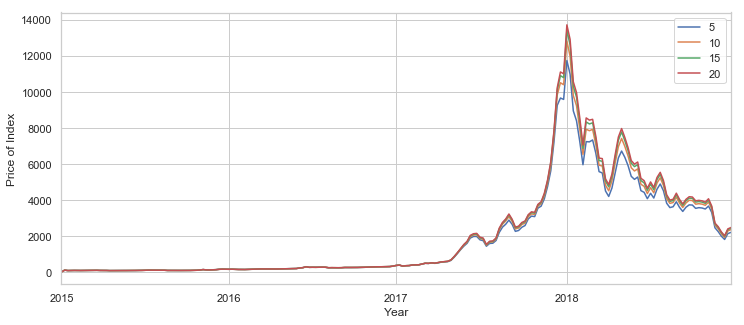

In [109]:
plot_df_avg = df.plot(legend=True,figsize=(12,5))
plot_df_avg.set(xlabel='Year', ylabel='Price of Index')

In [110]:
plot_df_avg.figure.savefig("avg_df.png")

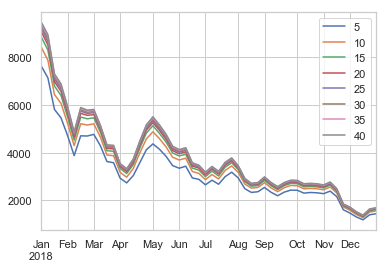

In [63]:
df['2018':].plot.line()

In [67]:
mktcap_comp = {}

daily = daily[daily.MktCap != '']
daily = daily[daily.MktCap != ' ']
total_mktcap = sum(daily.loc[sundays[-1]].MktCap.astype(float))

for pct in range(5, 45, 5):
    mktcap_comp[pct] = round(100 / total_mktcap * sum(weighted_df.sort_values(by=[sundays[-1]], ascending=False).dropna(subset=[sundays[-1]]).iloc[:,-1][0:pct]),2)
    
mktcap_comp['alle'] = 100
mktcap_comp = pd.DataFrame.from_dict(mktcap_comp, orient='index')
mktcap_comp = mktcap_comp.reset_index()
mktcap_comp.columns = ['Anzahl Währungen im Index', 'Prozent am ganzen Markt']

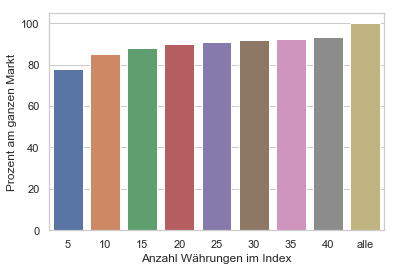

In [68]:
mktcap_comp_plot = sns.barplot(data=mktcap_comp, y='Prozent am ganzen Markt', x='Anzahl Währungen im Index')

In [70]:
mktcap_comp_plot.figure.savefig("avg_mkt_cap.png")

In [71]:
stats = df[1:].calc_stats()
stats.display()

Stat                 5           10          15          20          25          30          35          40
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2016-01-10  2016-01-10  2016-01-10  2016-01-10  2016-01-10  2016-01-10  2016-01-10  2016-01-10
End                  2018-12-30  2018-12-30  2018-12-30  2018-12-30  2018-12-30  2018-12-30  2018-12-30  2018-12-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         1330.02%    1446.36%    1500.37%    1529.67%    1547.03%    1559.99%    1570.83%    1579.54%
Daily Sharpe         3.54        3.59        3.61        3.62        3.63        3.63        3.64        3.64
Daily Sortino        7.00        7.16        7.24        7.27        7.28        7.29        7.29        7.29
CAGR                 144.87%     151.40%     154.32%     155.88%     156.79%     157.47%     158.0

In [76]:
weighted_df.sort_values(by=[sundays[-1]], ascending=False).dropna(subset=[sundays[-1]]).iloc[:,-1][0:5]

BTC    6.733925e+10
XRP    1.527571e+10
ETH    1.388375e+10
BCH    2.959503e+09
EOS    2.355338e+09
Name: 2018-12-30 00:00:00, dtype: float64

In [111]:
btc = pd.DataFrame(df_multi.loc['BTC'].Price.astype('float'))
xrp = pd.DataFrame(df_multi.loc['XRP'].Price.astype('float'))
eth = pd.DataFrame(df_multi.loc['ETH'].Price.astype('float'))
bch = pd.DataFrame(df_multi.loc['BCH'].Price.astype('float'))
eos = pd.DataFrame(df_multi.loc['EOS'].Price.astype('float'))

In [112]:
result = pd.concat([df[5], btc, xrp, eth, bch, eos], axis=1, sort=False)
result.columns= ['Kryptoindex', 'BTC', 'XRP', 'ETH', 'BCH', 'EOS']
result = result.ffill(axis = 0)

[Text(0, 0.5, 'Prices'), Text(0.5, 0, 'Date')]

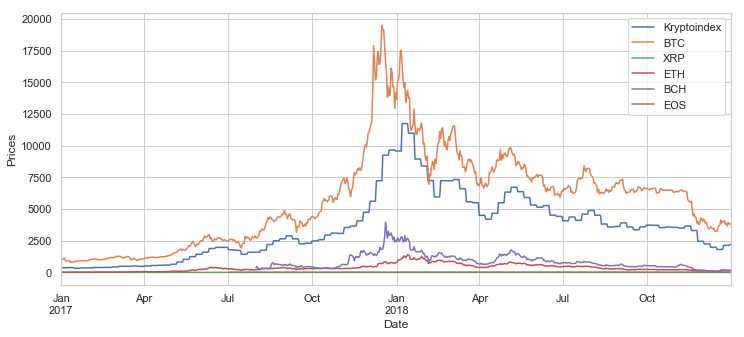

In [113]:
plot_comparison = result['2017':].plot(legend=True,figsize=(12,5))
plot_comparison.set(xlabel='Date', ylabel='Prices')

In [114]:
plot_comparison.figure.savefig("avg_plot_comparison.png")

In [115]:
stats = result.calc_stats()
stats.display()

Stat                 Kryptoindex    BTC         XRP         ETH         BCH         EOS
-------------------  -------------  ----------  ----------  ----------  ----------  ----------
Start                2017-08-01     2017-08-01  2017-08-01  2017-08-01  2017-08-01  2017-08-01
End                  2018-12-31     2018-12-31  2018-12-31  2018-12-31  2018-12-31  2018-12-31
Risk-free rate       0.00%          0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         37.87%         37.69%      99.21%      -41.19%     -60.25%     44.38%
Daily Sharpe         0.57           0.58        0.84        0.17        0.43        0.79
Daily Sortino        0.94           0.99        1.94        0.28        0.87        1.58
CAGR                 25.47%         25.35%      62.73%      -31.27%     -47.89%     29.63%
Max Drawdown         -84.64%        -83.40%     -92.20%     -93.96%     -98.03%     -91.92%
Calmar Ratio         0.30           0.30        0.68        -0.33       -0.49       

In [40]:
mktcap_comp = {}

total_mktcap = sum(daily.loc[sundays[-1]].MktCap.astype(float))

for pct in range(5, 45, 5):
    mktcap_comp[pct] = round(100 / total_mktcap * sum(weighted_df.sort_values(by=[sundays[-1]], ascending=False).dropna(subset=[sundays[-1]]).iloc[:,-1][0:pct]),2)
    
mktcap_comp[100] = 100

ValueError: could not convert string to float: 